##  Modal solutions
The eigenvector/values to this matrix equation are the modes and phase speeds of the interwaves inside a hard bottom and top ocean. 

$$ \Big[\Omega^2- N^2 \Big] W = \Big[ C_p^2 \Big] D_2 W$$

$$ A v = \lambda B v $$

$$ C_p^2 = \frac{\Omega^2- f^2}{K^2} $$

where $\Omega^2$ is a diagonal matrix of a the input frequency squared $N^2$ is a diagonal matrix of the brunt-viasala frequency and D2 is the matrix approximation of the second derivative

### Load Profile from the Oceans DB

In [144]:
%reload_ext autoreload
%autoreload 2

import seawater as sw
import oceansdb
import src.oceandepth as od
import src.iw_modes  as iwm
import matplotlib.pyplot as plt

LAT = 17.5
LON = 37.5
NP  = 100

#Grab Bottom Depth
dbb = oceansdb.ETOPO()
H = abs(dbb['topography'].extract(lat=LAT, lon=-LON)['height'][0])
odepth = od.odepth(H, NP,lat=LAT)
z = odepth.get_dim('z')

#Grab profile from data set
db = oceansdb.WOA()
SD = db['sea_water_salinity'].extract(var='mean',depth=z,doy=136.875,lat=LAT,lon=-LON)
TD = db['sea_water_temperature'].extract(var='mean',depth=z,doy=136.875,lat=LAT,lon=-LON)


#Filter out bad data as noted by data set
tavg = np.ma.filled(TD['mean'],fill_value=-1)
tavg = tavg[tavg>=0]
savg = np.ma.filled(SD['mean'],fill_value=-1)
savg = savg[savg>=0]

#Make multi-paramter ocean depth of max depth 4000 and 1000 points
odepth.add_dim('temperature',sw.library.T90conv(tavg))
odepth.add_dim('salinity',savg)

#Generate vertical Modes
N2 = odepth.get_dim('bfrq')
N2 = N2/(2*np.pi)

#Radians/s to CPH
cph = 3600/(2*np.pi)

In [75]:
Omega = 1/(24*3600)
C = 2*Omega*np.sin(np.pi*30/180)
C

1.1574074074074072e-05

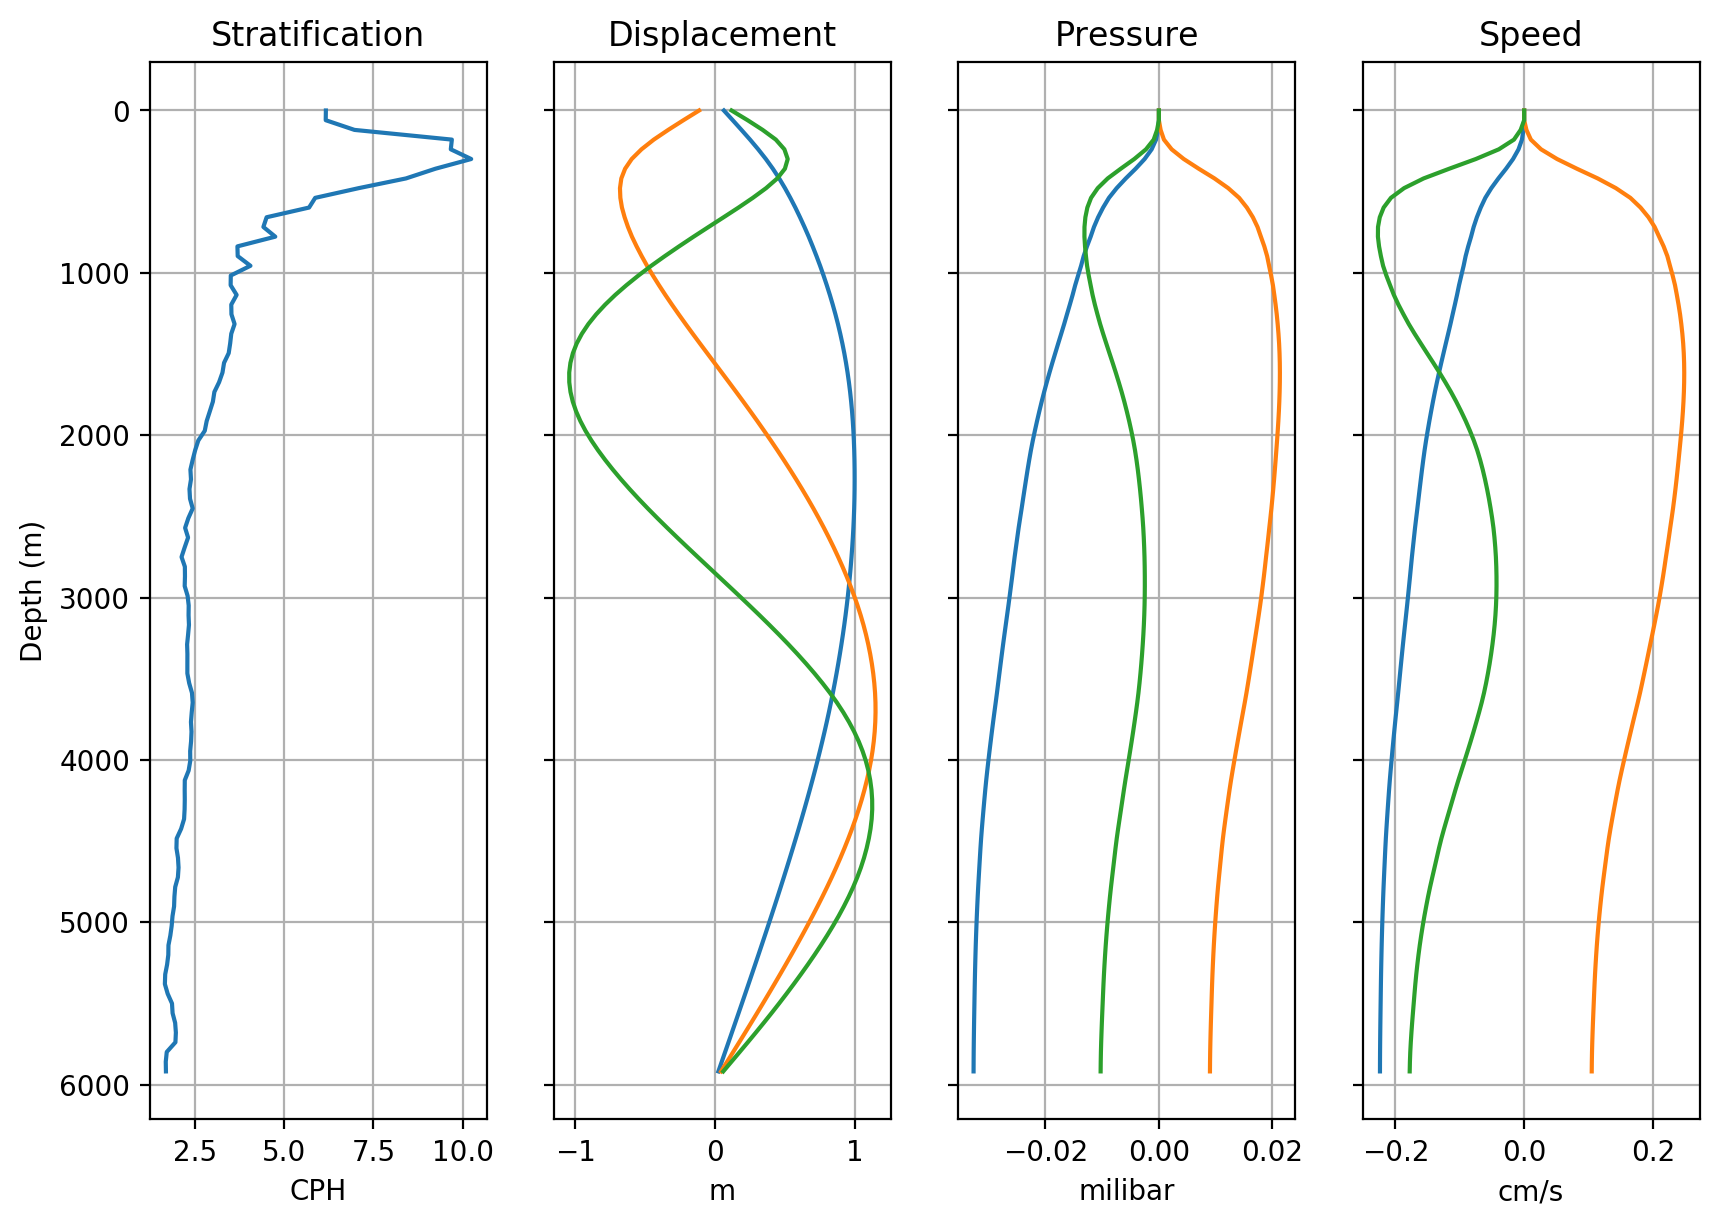

In [147]:
%matplotlib inline
import src.iw_plots as iwp
freq = 2*np.pi/(3600*24)
vm = iwm.InternalWaveModes(z,N2,freq=freq,f=C)
f, axs = iwp.mode_plot(vm)
f.set_size_inches(10,7)
f.set_dpi(200)

### Replicate and Ideal Stratification Profile

$$ N^2 \approx sech^2(x) $$

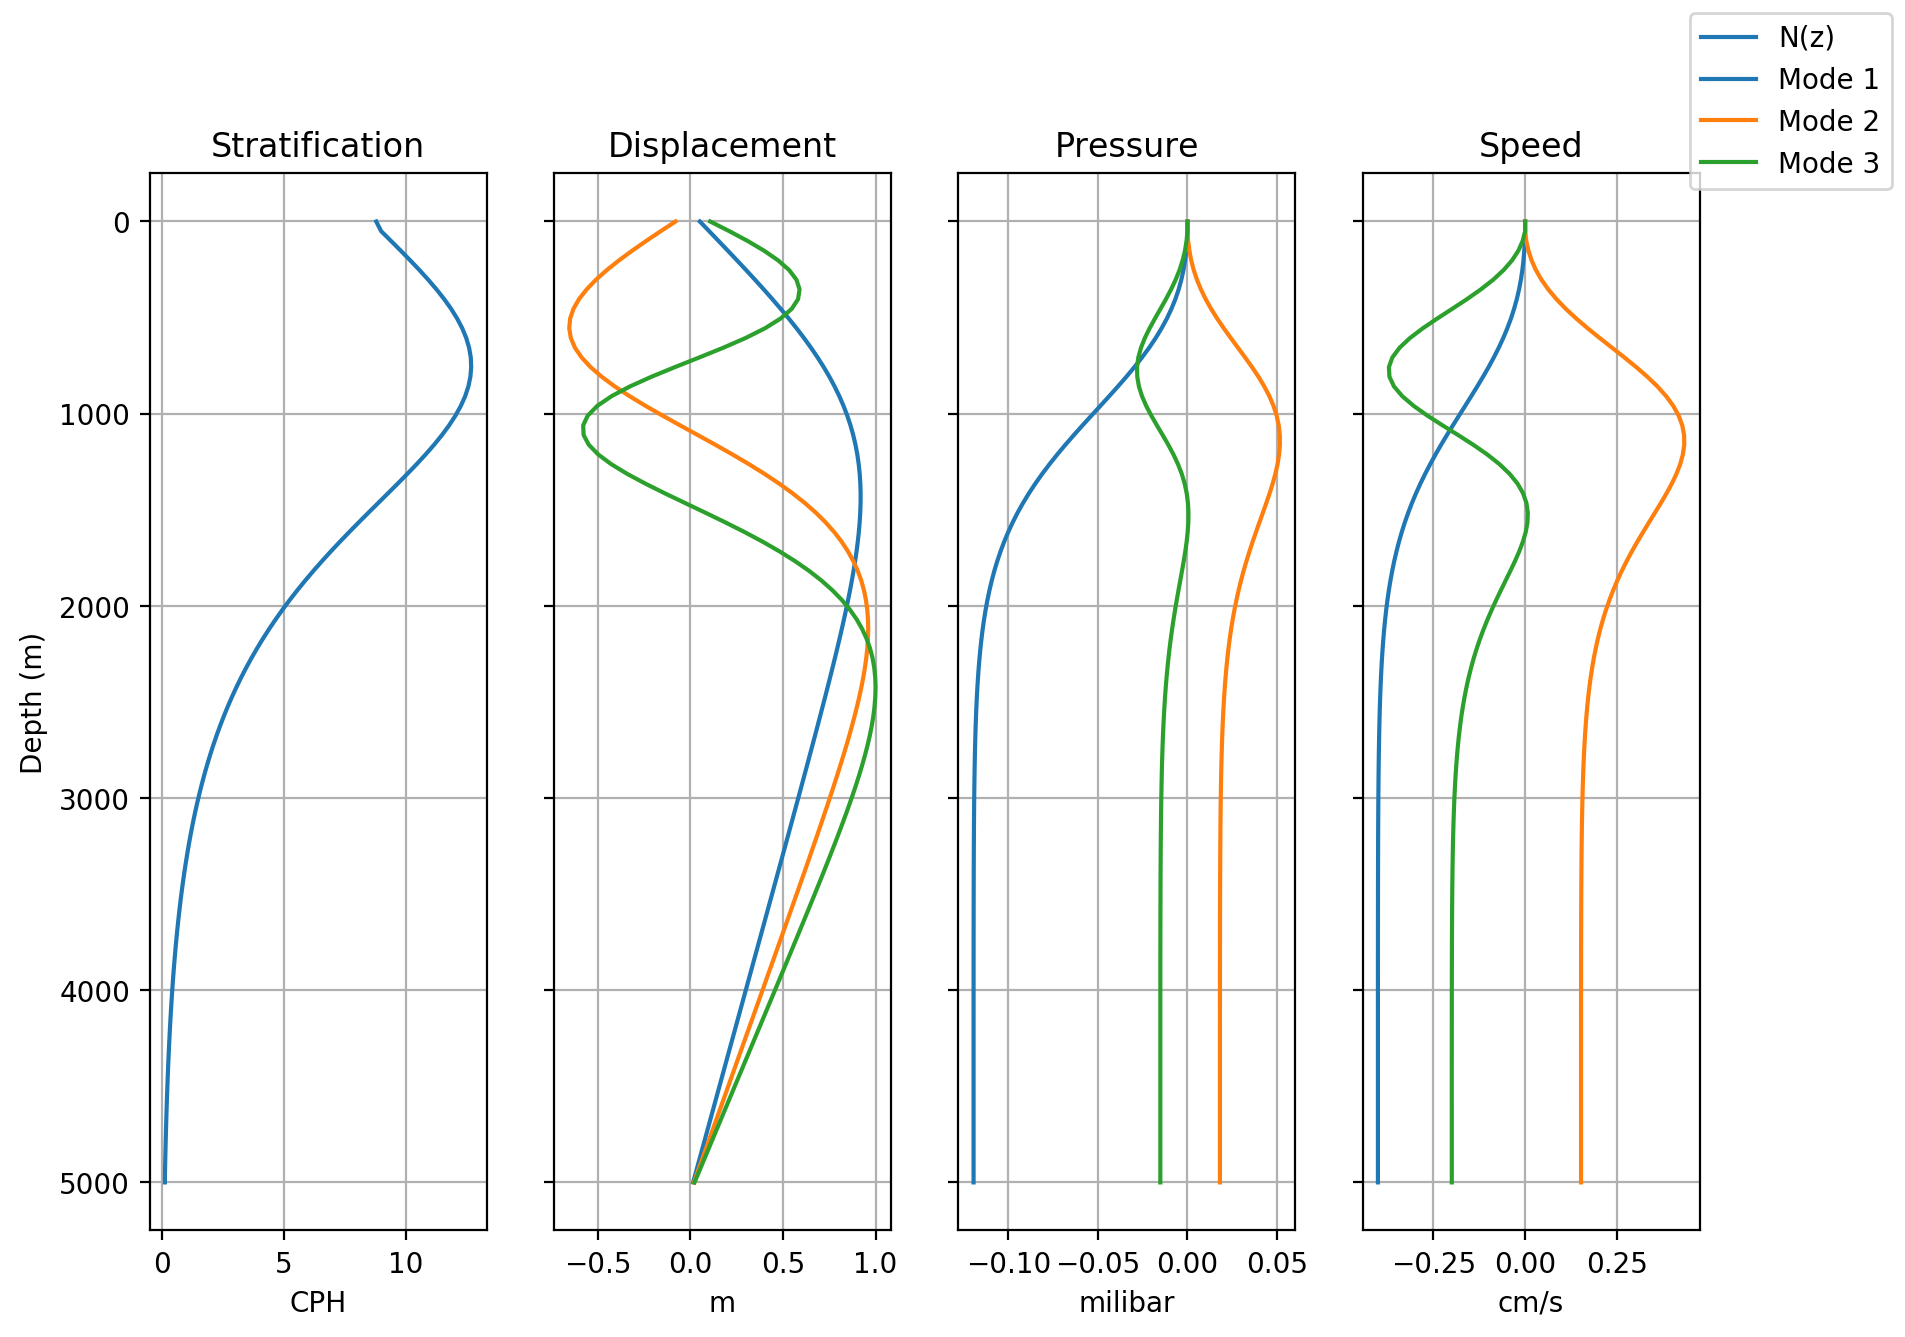

In [165]:
#Ideal Plots are default
z = np.linspace(0,5e3,100)
vm = iwm.InternalWaveModes(z,num_modes=3)
f, axs = iwp.mode_plot(vm)
f.set_size_inches(10,7)
f.legend(['N(z)','Mode 1','Mode 2','Mode 3'])
f.set_dpi(200)

In [163]:
import feather
df = pd.DataFrame({'strat': vm.N2})
feather.write_dataframe( df , 'strat_25.fthr')

## Dispersion Relationship


In [149]:
%matplotlib inline
#Wavelength Plot
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

def generate_hwaves(z,frequencies):
    modes_list = []
    mode_list = [iwm.InternalWaveModes(z,freq=f,f=C) for f in frequencies]
    amode = np.array([ m.hwavenumbers.real for m  in mode_list])
    return amode


freqs1 = np.linspace(C,4e-4)
amode1 = generate_hwaves(z,freqs1)
freqs2 = np.linspace(C,2.5e-5)
amode2 = generate_hwaves(z,freqs2)



/home/jpdef/Scripps/Projects/IW/notebooks/src/iw_modes.py:107: RuntimeWarning: invalid value encountered in true_divide
  uv = pm*kmag*np.sqrt(sqsum)/(1025*sqdiff)


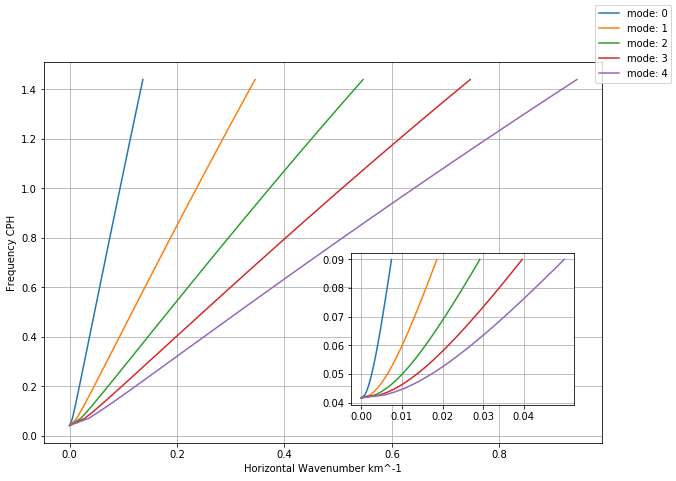

In [150]:

f,ax = plt.subplots()


for m in np.arange(0,5,1):
    ax.plot((1000*amode1[:,m]), 3600*freqs1,label= "mode: "+str(m))

ax.set_xlabel("Horizontal Wavenumber km^-1")
ax.set_ylabel("Frequency CPH")

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax, [0.55,0.1,0.4,0.4])
ax2.set_axes_locator(ip)


for m in np.arange(0,5,1):
    ax2.plot((1000*amode2[:,m]), 3600*freqs2)


ax.grid()
ax2.grid()
ax2.set_xticks(np.arange(0,0.05,0.01))
f.legend()
f.set_size_inches(10,7)

In [143]:
1.85e-2

0.0185